In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

Čisti podatki brezposelnosti po izobrazbah (združeni srednji stopnji) po občinah za leto 2022 (izbral december kot zadnje meritve), brez občin z manjkajočimi podatki iz 'zaposleni_df':

In [2]:
brezposelni_df = pd.read_csv('po-obcinah_izobrazba.csv')
brezposelni_df = brezposelni_df[(brezposelni_df['month'] == 'DEC') & (brezposelni_df['year'] == 2022)]

brezposelni_df.rename(columns={'OŠ ali manj': 'Basic or less'}, inplace=True)
brezposelni_df.rename(columns={'izobraževanje prve, druge, tretje stopnje': 'Tertiary'}, inplace=True)

brezposelni_df['Basic or less'] = pd.to_numeric(brezposelni_df['Basic or less'])
brezposelni_df[['Basic or less']] = brezposelni_df[['Basic or less']].astype(int)
brezposelni_df['srednje poklicno izobraževanje'] = pd.to_numeric(brezposelni_df['srednje poklicno izobraževanje'])
brezposelni_df['strokovno, splošno izobraževanje'] = pd.to_numeric(brezposelni_df['strokovno, splošno izobraževanje'])
brezposelni_df['Upper secondary'] = brezposelni_df['srednje poklicno izobraževanje'] + brezposelni_df['strokovno, splošno izobraževanje']
brezposelni_df['Tertiary'] = brezposelni_df['Tertiary'].replace('-', '0')
brezposelni_df['Tertiary'] = pd.to_numeric(brezposelni_df['Tertiary'])

brezposelni_df = brezposelni_df.drop(brezposelni_df.index[-1])

values_to_delete = ['OSILNICA', 'PODVELKA', 'HODOŠ', 'KOSTEL', 'RAZKRIŽJE', 'RIBNICA NA POHORJU']
rows_to_delete = brezposelni_df['Občina'].isin(values_to_delete)
brezposelni_df = brezposelni_df[~rows_to_delete]

brezposelni_df = brezposelni_df.sort_values('Občina')
brezposelni_df.reset_index(drop=True, inplace=True)

brezposelni_df = brezposelni_df[['Občina', 'Basic or less', 'Upper secondary', 'Tertiary']]
print(brezposelni_df)


         Občina  Basic or less  Upper secondary  Tertiary
0    AJDOVŠČINA            134              217        70
1       ANKARAN             26               45        13
2         APAČE             45               36        13
3      BELTINCI             88              124        26
4      BENEDIKT             12               22         5
..          ...            ...              ...       ...
201   ŽELEZNIKI             10               31        12
202      ŽETALE              8               10         2
203        ŽIRI             15               30        23
204   ŽIROVNICA             12               35        14
205   ŽUŽEMBERK             25               32        14

[206 rows x 4 columns]


Čisti podatki delovno aktivnih po izobrazbah po občinah za leto 2022, brez občin z manjkajočimi podatki iz 'zaposleni_df' in z enako poimenovanimi občinami:

In [3]:
zaposleni_df = pd.read_excel('zaposleni_po_obcinah.xlsx', header=1)
zaposleni_df = zaposleni_df.iloc[:, [0] + list(range(256, 271))]
zaposleni_df = zaposleni_df.drop([0, 1])

zaposleni_df = zaposleni_df[~(zaposleni_df =='z').any(axis=1)]
zaposleni_df = zaposleni_df[['Unnamed: 0', 'Basic or less.17', 'Upper secondary.17', 'Tertiary.17']]
zaposleni_df = zaposleni_df.rename(columns={'Unnamed: 0': 'Občina', 'Basic or less.17': 'Basic or less', 'Upper secondary.17': 'Upper secondary', 'Tertiary.17': 'Tertiary'})

zaposleni_df = zaposleni_df.reset_index(drop=True)

zaposleni_df['Basic or less'] = pd.to_numeric(zaposleni_df['Basic or less'])
zaposleni_df['Upper secondary'] = pd.to_numeric(zaposleni_df['Upper secondary'])
zaposleni_df['Tertiary'] = pd.to_numeric(zaposleni_df['Tertiary'])

zaposleni_df = zaposleni_df.sort_values('Občina')
zaposleni_df.reset_index(drop=True, inplace=True)

brezposelni_df_obcine = brezposelni_df['Občina']
zaposleni_df['Občina'] = brezposelni_df_obcine

print(zaposleni_df)

         Občina  Basic or less  Upper secondary  Tertiary
0    AJDOVŠČINA            923             4832      2383
1       ANKARAN             89              511       441
2         APAČE             72              320       134
3      BELTINCI            167              882       361
4      BENEDIKT             74              283       120
..          ...            ...              ...       ...
201   ŽELEZNIKI            436             1662       886
202      ŽETALE             38               91        44
203        ŽIRI            254             1569       625
204   ŽIROVNICA             59              493       237
205   ŽUŽEMBERK            171              695       282

[206 rows x 4 columns]


Združen DataFrame zaposlenih in brezposelnih prek Občin:

In [4]:

merged_df = brezposelni_df.merge(zaposleni_df, on='Občina',  how='outer', suffixes=(' brezposelni', ' zaposleni'))

print(merged_df)

         Občina  Basic or less brezposelni  Upper secondary brezposelni  \
0    AJDOVŠČINA                        134                          217   
1       ANKARAN                         26                           45   
2         APAČE                         45                           36   
3      BELTINCI                         88                          124   
4      BENEDIKT                         12                           22   
..          ...                        ...                          ...   
201   ŽELEZNIKI                         10                           31   
202      ŽETALE                          8                           10   
203        ŽIRI                         15                           30   
204   ŽIROVNICA                         12                           35   
205   ŽUŽEMBERK                         25                           32   

     Tertiary brezposelni  Basic or less zaposleni  Upper secondary zaposleni  \
0                 

Izračunane stopnje zaposlenosti v nov DataFrame:

In [5]:
merged_df['Basic or less'] = merged_df['Basic or less zaposleni'] / (merged_df['Basic or less zaposleni'] + merged_df['Basic or less brezposelni'])
merged_df['Upper secondary'] = merged_df['Upper secondary zaposleni'] / (merged_df['Upper secondary zaposleni'] + merged_df['Upper secondary brezposelni'])
merged_df['Tertiary'] = merged_df['Tertiary zaposleni'] / (merged_df['Tertiary zaposleni'] + merged_df['Tertiary brezposelni'])

stopnje_df = merged_df[['Občina', 'Basic or less', 'Upper secondary', 'Tertiary']]
stopnje_df['Najvišja stopnja zaposlenosti'] = stopnje_df.iloc[:, 1:].idxmax(axis=1)
print(stopnje_df)
stopnje_df.to_csv("stopnje_obcine.csv", sep=',', encoding='utf-8')

         Občina  Basic or less  Upper secondary  Tertiary  \
0    AJDOVŠČINA       0.873226         0.957021  0.971464   
1       ANKARAN       0.773913         0.919065  0.971366   
2         APAČE       0.615385         0.898876  0.911565   
3      BELTINCI       0.654902         0.876740  0.932817   
4      BENEDIKT       0.860465         0.927869  0.960000   
..          ...            ...              ...       ...   
201   ŽELEZNIKI       0.977578         0.981689  0.986637   
202      ŽETALE       0.826087         0.900990  0.956522   
203        ŽIRI       0.944238         0.981238  0.964506   
204   ŽIROVNICA       0.830986         0.933712  0.944223   
205   ŽUŽEMBERK       0.872449         0.955983  0.952703   

    Najvišja stopnja zaposlenosti  
0                        Tertiary  
1                        Tertiary  
2                        Tertiary  
3                        Tertiary  
4                        Tertiary  
..                            ...  
201            

C:\Users\Matej\AppData\Local\Temp\ipykernel_50328\3819056186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopnje_df['Najvišja stopnja zaposlenosti'] = stopnje_df.iloc[:, 1:].idxmax(axis=1)


še vizualizacija:

Števci, v koliko občinah ima določena stopnja izobrazbe najvišjo zaposlenost:

In [6]:
column_counters = stopnje_df['Najvišja stopnja zaposlenosti'].value_counts()
all_columns = stopnje_df.columns[1:4]
column_counters = column_counters.reindex(all_columns, fill_value=0)

print(column_counters)

Basic or less        0
Upper secondary     30
Tertiary           176
Name: Najvišja stopnja zaposlenosti, dtype: int64


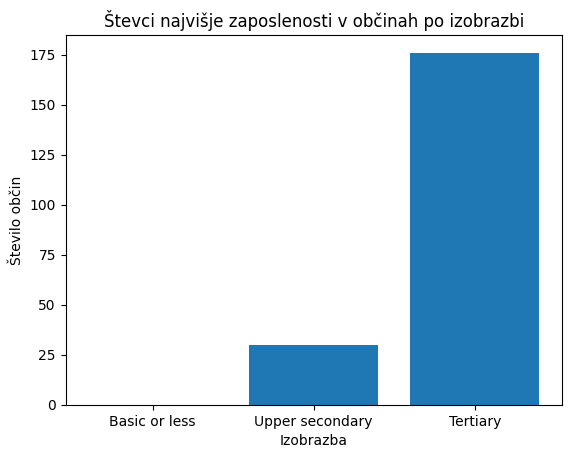

In [7]:
plt.bar(column_counters.index, column_counters.values)
plt.xlabel('Izobrazba')
plt.ylabel('Število občin')
plt.title('Števci najvišje zaposlenosti v občinah po izobrazbi')
plt.show()

Še vizualizacija na zemljevidu Slovenije:

In [8]:
import json

with open("..\colored_map\slovenija_obcine.json", "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

Sprememba imen občin za lažjo povezavo

In [9]:
replacements = [(' ', ''), ('Č', 'C'), ('Š', 'S'), ('Ž', 'Z')]
df_obcine = []
json_obcine = []

def reformat(text):
    rf = text
    for a,b in replacements:
        rf = rf.replace(a, b)
    return rf

for features in data["features"]:
    features["properties"]["NAME_2"] = reformat(features["properties"]["NAME_2"].upper())
    json_obcine.append(features["properties"]["NAME_2"])
    
for a in range(0, len(stopnje_df)):
    stopnje_df.loc[a, 'Občina'] = reformat(stopnje_df.loc[a, 'Občina'].upper())
    df_obcine.append(stopnje_df.loc[a, 'Občina'])
    

Barvanje občin

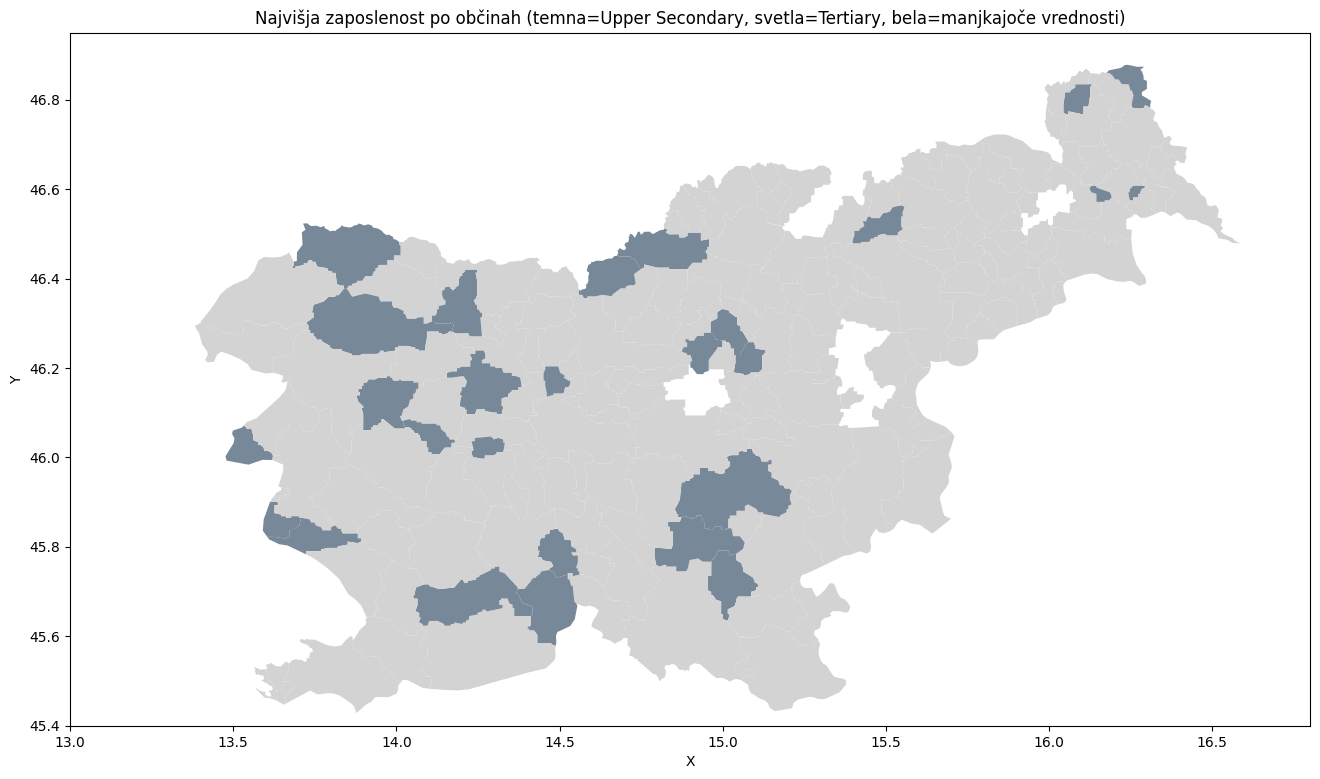

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import random

fig, ax = plt.subplots(figsize=(16, 9))

for features in data["features"]:
    obcina = features["properties"]["NAME_2"]
    coords = features["geometry"]["coordinates"]
    coordinate_pairs = coords[0][0]
    x_coords, y_coords = zip(*coordinate_pairs)

    #ax.plot(x_coords, y_coords, marker='o')
    
    if obcina in ['SVETIANDRAZVSLOVENSKIHGORICA', 'SVETIJURIJ', 'SENTJURPRICELJU']:
        polygon = Polygon(coordinate_pairs, closed=True, facecolor='lightgrey')
    else:
        for a in range(0, len(stopnje_df)):
            if stopnje_df.loc[a, 'Občina'] == obcina:
                if stopnje_df.loc[a, 'Najvišja stopnja zaposlenosti'] == 'Tertiary':
                    polygon = Polygon(coordinate_pairs, closed=True, facecolor='lightgrey')
                else:
                    polygon = Polygon(coordinate_pairs, closed=True, facecolor='lightslategrey')
                ax.add_patch(polygon)
            
    

ax.set_xlim(13, 16.8)
ax.set_ylim(45.4, 46.95)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_title('Najvišja zaposlenost po občinah (temna=Upper Secondary, svetla=Tertiary, bela=manjkajoče vrednosti)')
plt.show()

**Zanimivost:**
Opazimo lahko, da srednješolska stopnja izobrazbe prevladuje na območjih z manjšo poseljenostjo v Sloveniji.